In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt

import keras_tuner as kt

In [17]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [18]:
train_index = np.random.randint(0,50000, size = 10000)
test_index = np.random.randint(0,10000, size = 2000)

train_x = X_train[train_index]
train_y = y_train[train_index]

test_x = X_test[test_index]
test_y = y_test[test_index]

In [19]:
# normalising the values
X_train = X_train / 255
X_test = X_test / 255

train_x = train_x /255
test_x = test_x /255

# Advanced Feature No.1 - Hyperparameter Tuning

In [20]:
kt.HyperParameters()

In [21]:
def generateModel(hp):
    # Hyperparameter Tuning
    model2 = Sequential(name="Image_Recognition_Model")
    model2.add(Conv2D(hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),(hp.Choice('conv_1_kernel', values = [3,3])), activation="relu", input_shape = (32,32,3)))
    model2.add(MaxPooling2D((2,2)))
    model2.add(Dropout(0.2)) #  To prevent model from overfitting, random neurons will be dropped out randomly
    model2.add(Conv2D(hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),(hp.Choice('conv_1_kernel', values = [3,3])), activation="relu", input_shape = (32,32,3)))
    model2.add(MaxPooling2D((2,2)))
    model2.add(Dropout(0.2))
    model2.add(Flatten()) # Flatten all dimensions into 1D array to be filtered by dense layer
    model2.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=64, step=16), activation="relu"))
    model2.add(Dense(10, activation="softmax" )) # 10 Layers for 10 classes

    model2.compile(
        optimizer="adam", 
        loss="sparse_categorical_crossentropy", 
        metrics=['accuracy']
    )

    return model2


In [22]:
#importing random search
from kerastuner import RandomSearch
#creating randomsearch object
tuner = RandomSearch(generateModel, objective='val_accuracy', max_trials = 5)
# search best parameter
tuner.search(train_x,train_y,epochs=3, validation_data =(train_x,train_y))

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [23]:
model2=tuner.get_best_models(num_models=1)[0]
#summary of best model
model2.summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 112)       3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 112)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 112)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 112)       113008    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 112)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 1

In [24]:
history = model2.fit(test_x,test_y,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
57/57 [==============================] - 10s 155ms/step - loss: 1.3438 - accuracy: 0.5061 - val_loss: 1.3412 - val_accuracy: 0.5350
Epoch 5/10
57/57 [==============================] - 8s 137ms/step - loss: 1.2334 - accuracy: 0.5628 - val_loss: 1.2524 - val_accuracy: 0.5450
Epoch 6/10
57/57 [==============================] - 7s 130ms/step - loss: 1.1428 - accuracy: 0.5933 - val_loss: 1.2919 - val_accuracy: 0.5500
Epoch 7/10
57/57 [==============================] - 7s 117ms/step - loss: 1.0352 - accuracy: 0.6211 - val_loss: 1.2475 - val_accuracy: 0.5500
Epoch 8/10
57/57 [==============================] - 8s 139ms/step - loss: 0.9484 - accuracy: 0.6611 - val_loss: 1.3534 - val_accuracy: 0.5250
Epoch 9/10
57/57 [==============================] - 8s 135ms/step - loss: 0.8626 - accuracy: 0.6928 - val_loss: 1.2519 - val_accuracy: 0.5400
Epoch 10/10
57/57 [==============================] - 7s 125ms/step - loss: 0.7395 - accuracy: 0.7483 - val_loss: 1.2551 - val_accuracy: 0.5750


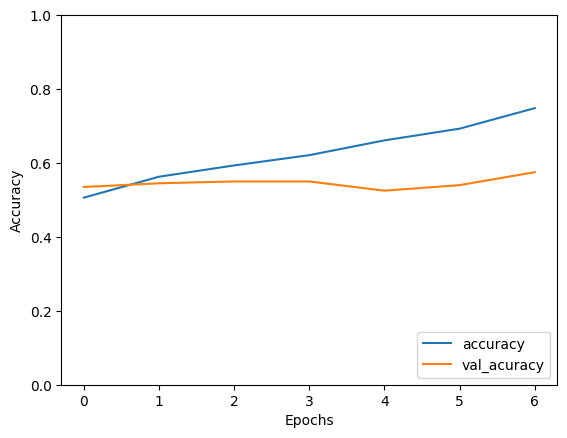

In [25]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_acuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

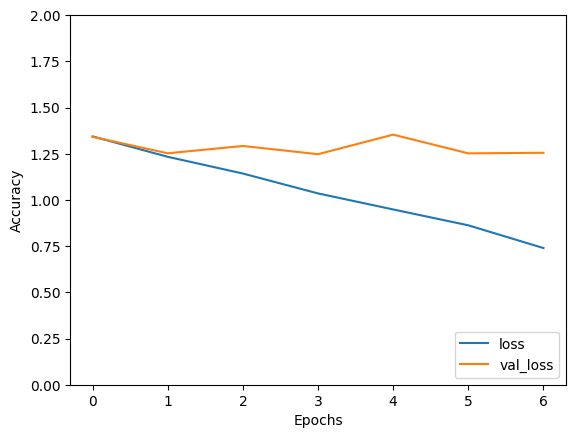

In [26]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,2])
plt.legend(loc = 'lower right')

In [27]:
model2.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


# Advanced Feature No. 3 - Python Function

In [28]:
import cv2


def ImageRead(imagePath):

    result = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

    img = cv2.imread(imagePath)
    plt.imshow(img)
    plt.show()
    resize = tf.image.resize(img,(32,32))
    predictions = model2.predict(np.expand_dims(resize/255, 0)) 
    yhat = tf.nn.softmax(predictions[0])
    print(yhat)
    # print(" Result is {classes}".format(classes=result[yhat]))
    


In [32]:
def ImageRead2(img_path):

    class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

    img = tf.keras.utils.load_img(
        img_path, target_size=(32, 32)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model2.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

In [37]:
ImageRead2("truck.jpg")

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to truck with a 23.20 percent confidence.
